En esta seccion aprenderás todo sobre los **histogramas** y los **gráficos de densidad**.

# Configuración del notebook

Como siempre, comenzamos configurando el entorno de programación.


In [1]:

import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# Seleccionar un conjunto de datos

Trabajaremos con un conjunto de datos de 150 flores diferentes, es decir, 50 de cada una de tres especies distintas de iris (*Iris setosa*, *Iris versicolor* y *Iris virginica*).

![tut4_iris](https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png)

# Cargar y examinar los datos

Cada fila del conjunto de datos corresponde a una flor diferente. Hay cuatro mediciones: la longitud y el ancho del sépalo, junto con la longitud y el ancho del pétalo. También se registra la especie correspondiente.



In [2]:
# Path of the file to read
iris_filepath = "/content/iris.csv"

# Read the file into a variable iris_data
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# Print the first 5 rows of the data
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# Histogramas

Supongamos que queremos crear un **histograma** para observar cómo varía la longitud del pétalo en las flores de iris. Podemos hacerlo con el comando `sns.histplot`.


<Axes: xlabel='Petal Length (cm)', ylabel='Count'>

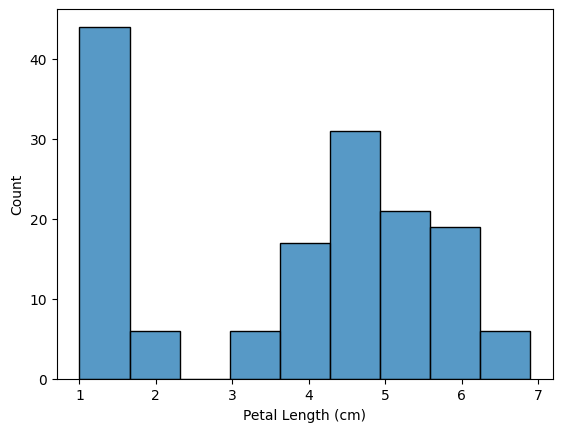

In [3]:
# Histogram
sns.histplot(iris_data['Petal Length (cm)'])

En la celda de código anterior, tuvimos que indicarle al comando la columna que queríamos graficar (_en este caso, elegimos `'Petal Length (cm)'`_).

# Gráficos de densidad

El siguiente tipo de gráfico es un **gráfico de estimación de densidad por núcleo (KDE)**. Si no estás familiarizado con los gráficos KDE, puedes pensar en ellos como un histograma suavizado.

Para crear un gráfico KDE, usamos el comando `sns.kdeplot`. Establecer `shade=True` colorea el área bajo la curva (_y `data=` selecciona la columna que queremos graficar_).


/tmp/ipython-input-4-1909998234.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)


<Axes: xlabel='Petal Length (cm)', ylabel='Density'>

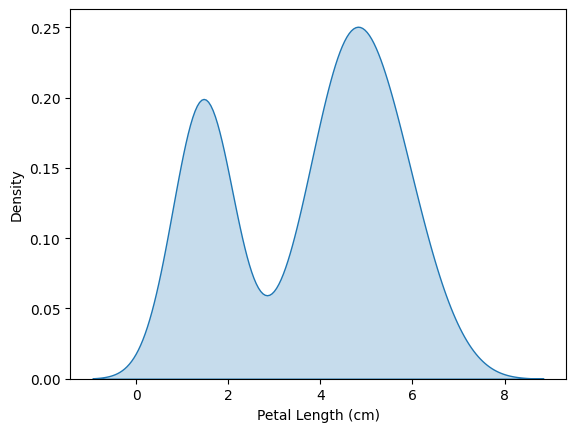

In [4]:
# KDE plot
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

# Gráficos KDE en 2D

No estamos limitados a una sola columna al crear un gráfico KDE. Podemos crear un **gráfico de estimación de densidad en dos dimensiones (KDE 2D)** con el comando `sns.jointplot`.

En el gráfico a continuación, la codificación por colores nos muestra qué tan probable es observar diferentes combinaciones de ancho de sépalo y longitud de pétalo, donde las zonas más oscuras de la figura son las más probables.



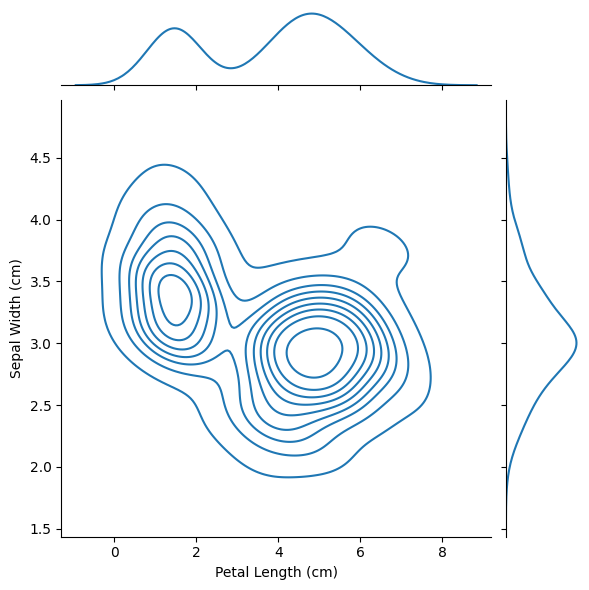

In [5]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

Ten en cuenta que, además del gráfico KDE 2D en el centro:
- la curva en la parte superior de la figura es un gráfico KDE para los datos del eje x (en este caso, `iris_data['Petal Length (cm)']`), y
- la curva en el lado derecho de la figura es un gráfico KDE para los datos del eje y (en este caso, `iris_data['Sepal Width (cm)']`).


# Gráficos codificados por color

En la siguiente parte del tutorial, crearemos gráficos para entender las diferencias entre las especies.

Podemos crear tres histogramas diferentes (uno para cada especie) de la longitud del pétalo utilizando el comando `sns.histplot` (_como se mostró anteriormente_).  
- `data=` indica el nombre de la variable que usamos para cargar los datos  
- `x=` establece el nombre de la columna con los datos que queremos graficar  
- `hue=` define la columna que usaremos para dividir los datos en diferentes histogramas  


Text(0.5, 1.0, 'Histogram of Petal Lengths, by Species')

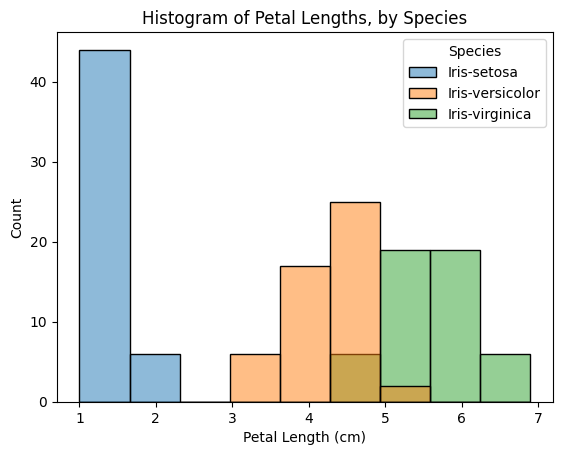

In [6]:
# Histograms for each species
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species')

# Add title
plt.title("Histogram of Petal Lengths, by Species")

También podemos crear un gráfico KDE para cada especie utilizando `sns.kdeplot` (_como se mostró anteriormente_). La funcionalidad de los parámetros `data`, `x` y `hue` es idéntica a la que usamos con `sns.histplot` anteriormente. Además, establecemos `shade=True` para colorear el área bajo cada curva.


/tmp/ipython-input-7-1557107132.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)


Text(0.5, 1.0, 'Distribution of Petal Lengths, by Species')

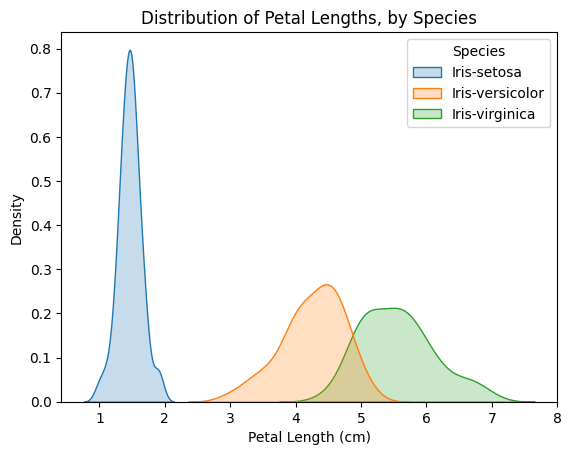

In [7]:
# KDE plots for each species
sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True)

# Add title
plt.title("Distribution of Petal Lengths, by Species")

Un patrón interesante que puede observarse en los gráficos es que las plantas parecen pertenecer a uno de dos grupos, donde _Iris versicolor_ e _Iris virginica_ parecen tener valores similares en la longitud del pétalo, mientras que _Iris setosa_ pertenece a una categoría completamente distinta.

De hecho, según este conjunto de datos, podríamos incluso clasificar cualquier planta de iris como *Iris setosa* (en lugar de *Iris versicolor* o *Iris virginica*) solo con observar la longitud del pétalo: ¡si la longitud del pétalo de una flor de iris es menor a 2 cm, lo más probable es que sea *Iris setosa*!

